In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_excel('all_patients.xlsx')
df = df[df.shape_VoxelVolume > 125]
df.drop(df[df['labels'] == 3].index, inplace = True) ## dropping label of the call OTHERS
df.drop(df[df['number_annotations'] > 1].index, inplace = True)
df = df.drop('number_annotations', axis = 1)
df = df.set_index(['subjid', 'label'])
df = df.iloc[:, :-4]
df

shape_Elongation  shape_Flatness  shape_LeastAxisLength   
subjid   label                                                            
Oslo01   1              0.829356        0.682981               8.512717  \
         2              0.944143        0.900681              14.133927   
Oslo02   4              0.849295        0.841082               8.703783   
         5              0.939828        0.821847              12.093804   
Oslo03   1              0.930698        0.629604              10.914986   
...                          ...             ...                    ...   
Stan_328 1              0.810571        0.325076               8.769420   
         8              0.967496        0.597282               6.131668   
         11             0.561746        0.506390               5.004740   
         12             0.959775        0.756903               5.164755   
Stan_338 4              0.819799        0.618051               8.548537   

                shape_MajorAxisLength  shape_Maximum2DDiameterColumn   
subjid   label                                                         
Oslo01   1                  12.464063                      14.866069  \
         2                  15.692487                      17.804494   
Oslo02   4                  10.348315                      10.816654   
         5                  14.715396                      17.262677   
Oslo03   1                  17.336268                      20.615528   
...                               ...                            ...   
Stan_328 1                  26.976501                      31.384710   
         8                  10.265944                      11.661904   
         11                  9.883181                       8.246211   
         12                  6.823538                       7.615773   
Stan_338 4                  13.831433                      14.142136   

                shape_Maximum2DDiameterRow  shape_Maximum2DDiameterSlice   
subjid   label                                                             
Oslo01   1                       14.560220                     12.529964  \
         2                       19.416488                     18.681542   
Oslo02   4                       11.704700                     11.704700   
         5                       17.888544                     17.492856   
Oslo03   1                       18.439089                     19.416488   
...                                    ...                           ...   
Stan_328 1                       28.160256                     27.459060   
         8                       12.369317                     12.165525   
         11                      11.704700                     10.000000   
         12                       8.602325                      8.602325   
Stan_338 4                       15.297059                     17.204651   

                shape_Maximum3DDiameter  shape_MeshVolume   
subjid   label                                              
Oslo01   1                    15.394804        728.083333  \
         2                    19.467922       2320.625000   
Oslo02   4                    12.449900        538.666667   
         5                    18.000000       1681.250000   
Oslo03   1                    20.712315       2068.958333   
...                                 ...               ...   
Stan_328 1                    33.075671       3310.541667   
         8                    12.688578        375.166667   
         11                   12.124356        159.791667   
         12                    8.602325        149.333333   
Stan_338 4                    17.291616        821.541667   

                shape_MinorAxisLength  ...   
subjid   label                         ...   
Oslo01   1                  10.337151  ...  \
         2                  14.815951  ...   
Oslo02   4                   8.788767  ...   
         5                  13.829936  ...   
Oslo03   1                  16.134831  ...  

In [11]:
df.isnull().sum()

shape_Elongation                 0
shape_Flatness                   0
shape_LeastAxisLength            0
shape_MajorAxisLength            0
shape_Maximum2DDiameterColumn    0
                                ..
ngtdm_Busyness                   0
ngtdm_Coarseness                 0
ngtdm_Complexity                 0
ngtdm_Contrast                   0
ngtdm_Strength                   0
Length: 107, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(df)
data = pd.DataFrame(data, columns=df.columns, index=df.index)
data

shape_Elongation  shape_Flatness  shape_LeastAxisLength   
subjid   label                                                            
Oslo01   1              0.271697        0.329390               0.015110  \
         2              1.117771        1.736763               1.157814   
Oslo02   4              0.418657        1.351472               0.053950   
         5              1.085964        1.227122               0.743089   
Oslo03   1              1.018671       -0.015676               0.503454   
...                          ...             ...                    ...   
Stan_328 1              0.133232       -1.984367               0.067293   
         8              1.289905       -0.224628              -0.468921   
         11            -1.700824       -0.812225              -0.698008   
         12             1.232994        0.807275              -0.665479   
Stan_338 4              0.201251       -0.090362               0.022391   

                shape_MajorAxisLength  shape_Maximum2DDiameterColumn   
subjid   label                                                         
Oslo01   1                  -0.162538                       0.022209  \
         2                   0.242812                       0.367615   
Oslo02   4                  -0.428184                      -0.453792   
         5                   0.120131                       0.303926   
Oslo03   1                   0.449199                       0.698047   
...                               ...                            ...   
Stan_328 1                   1.659592                       1.963943   
         8                  -0.438526                      -0.354434   
         11                 -0.486584                      -0.755942   
         12                 -0.870742                      -0.830049   
Stan_338 4                   0.009144                      -0.062888   

                shape_Maximum2DDiameterRow  shape_Maximum2DDiameterSlice   
subjid   label                                                             
Oslo01   1                       -0.003891                     -0.326731  \
         2                        0.603901                      0.379786   
Oslo02   4                       -0.361278                     -0.421513   
         5                        0.412670                      0.243264   
Oslo03   1                        0.481574                      0.464196   
...                                    ...                           ...   
Stan_328 1                        1.698239                      1.387896   
         8                       -0.278097                     -0.368587   
         11                      -0.361278                     -0.617300   
         12                      -0.749560                     -0.777825   
Stan_338 4                        0.088329                      0.210163   

                shape_Maximum3DDiameter  shape_MeshVolume   
subjid   label                                              
Oslo01   1                    -0.161722         -0.251860  \
         2                     0.268978          0.201382   
Oslo02   4                    -0.473122         -0.305769   
         5                     0.113757          0.019414   
Oslo03   1                     0.400563          0.129757   
...                                 ...               ...   
Stan_328 1                     1.707890          0.483115   
         8                    -0.447884         -0.352302   
         11                   -0.507546         -0.413598   
         12                   -0.879972         -0.416575   
Stan_338 4                     0.038851         -0.225262   

                shape_MinorAxisLength  ...   
subjid   label                         ...   
Oslo01   1                  -0.054900  ...  \
         2                   0.694048  ...   
Oslo02   4                  -0.313822  ...   
         5                   0.529166  ...   
Oslo03   1                   0.914592  ...  

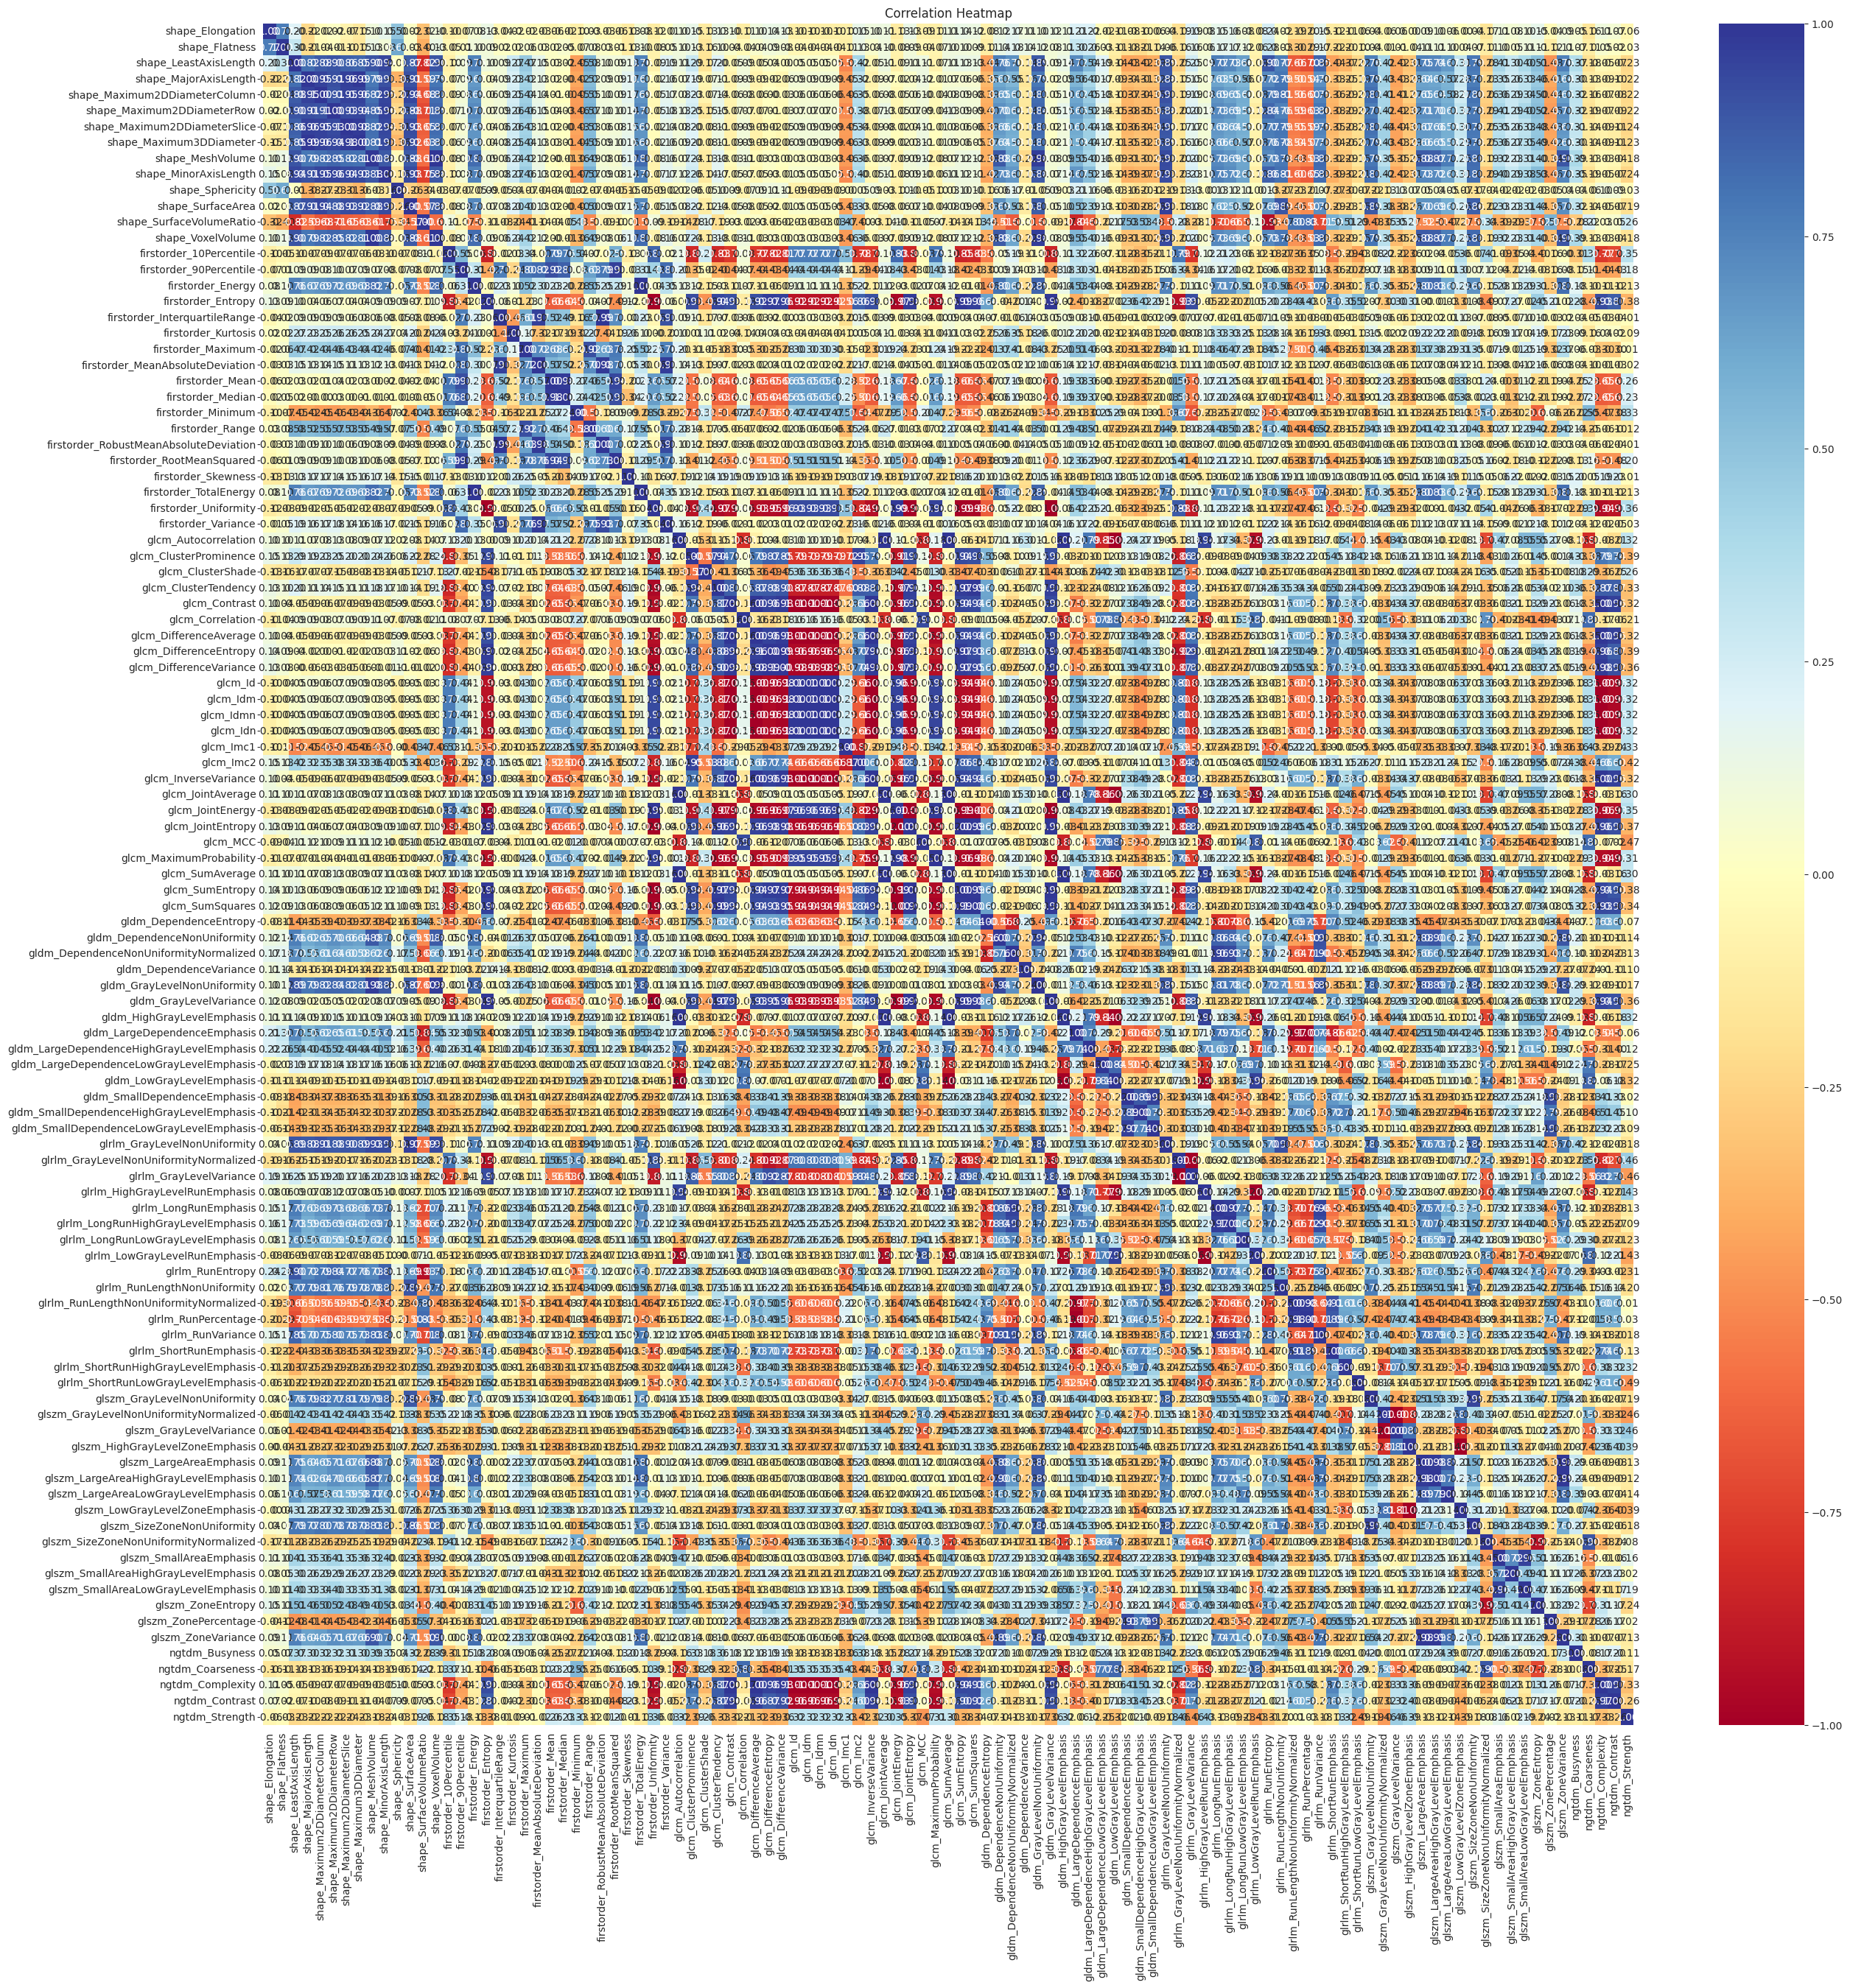

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'data' with 107 features
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a large heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu")

# Adjust the plot settings
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [204]:
from sklearn.decomposition import PCA
penes_gordos = []
# Assuming 'X' is your feature matrix with shape (n_samples, n_features)
pca = PCA(n_components=12)
principal_components = pca.fit_transform(data)
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
feature_loadings = pca.components_[0]
top_features_indices = np.where(np.abs(feature_loadings) > 0.14)
#top_features = data.columns[top_features_indices]
penes_gordos.append(top_features_indices)
#########################################################

In [186]:
feature_loadings = pca.components_[1]
top_features_indices = np.where(np.abs(feature_loadings) > 0.18)
#top_features = data.columns[top_features_indices]
###########################################################
penes_gordos.append(top_features_indices)

In [187]:
feature_loadings = pca.components_[2]
top_features_indices = np.where(np.abs(feature_loadings) > 0.18)
#top_features = data.columns[top_features_indices]
##########################################################
penes_gordos.append(top_features_indices)

In [188]:
feature_loadings = pca.components_[3]
top_features_indices = np.where(np.abs(feature_loadings) > 0.18)
#top_features = data.columns[top_features_indices]
#############################################################
penes_gordos.append(top_features_indices)

In [173]:
feature_loadings = pca.components_[4]
top_features_indices = np.where(np.abs(feature_loadings) > 0.18)
#top_features = data.columns[top_features_indices]
#############################################################
penes_gordos.append(top_features_indices)

In [175]:
feature_loadings = pca.components_[5]
top_features_indices = np.where(np.abs(feature_loadings) > 0.18)
#top_features = data.columns[top_features_indices]
penes_gordos.append(top_features_indices)

In [205]:
final_list = []
for j in range(6):
    for i in penes_gordos[j]:
        if i not in final_list:
            final_list.append(i)

IndexError: list index out of range

In [206]:
final_list

[array([ 36,  38,  39,  40,  41,  42,  43,  44,  47,  56,  63,  80,  81,
         83, 104, 105])]

In [207]:
combined_array = np.concatenate(final_list)

In [208]:
combined_array

array([ 36,  38,  39,  40,  41,  42,  43,  44,  47,  56,  63,  80,  81,
        83, 104, 105])

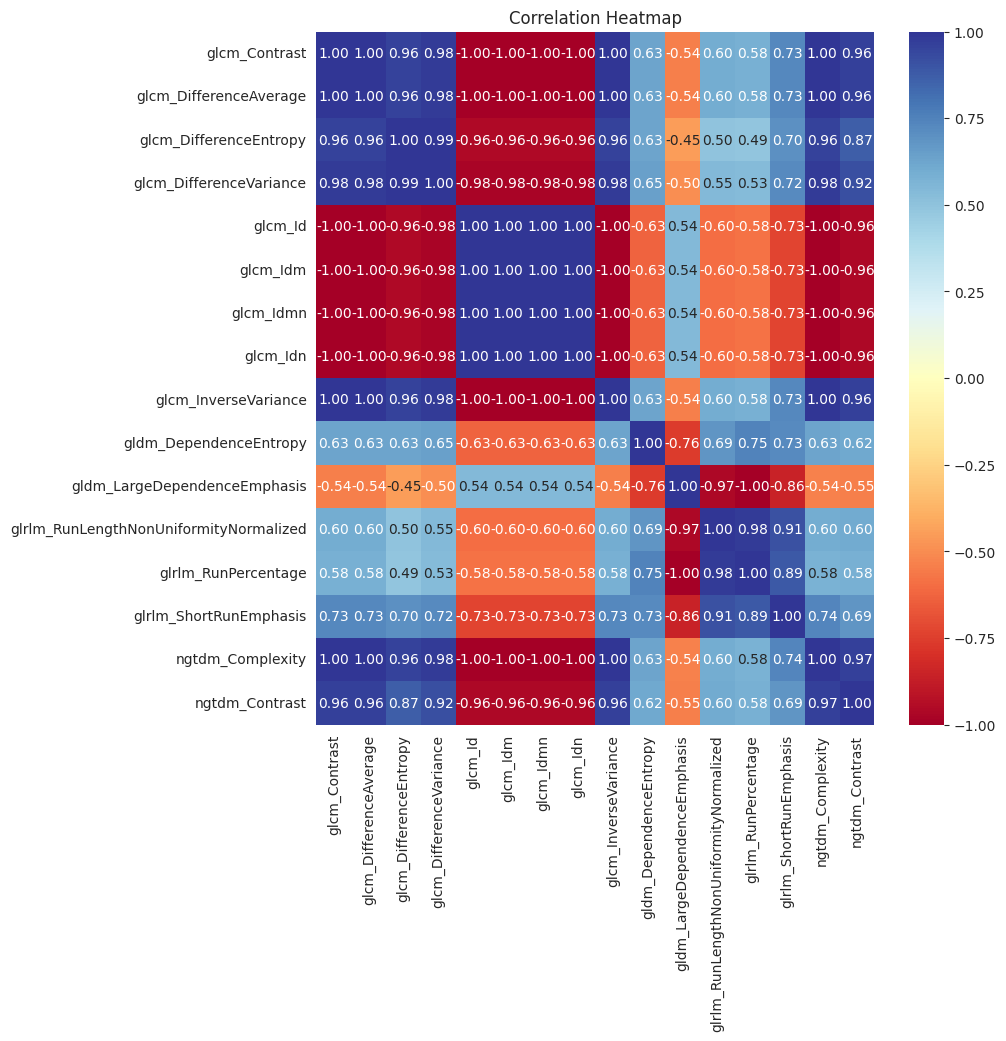

In [213]:
combined_array
top_features = data.columns[combined_array]
top_40 = data[top_features]

correlation_matrix = top_40.corr()

# Create a large heatmap with positive correlations only
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu")

# Adjust the plot settings
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [93]:

# Get the absolute magnitude of feature loadings
feature_loadings = np.abs(pca.components_)
# Get the indices of the top 40 features
top_12_indices = np.argsort(-feature_loadings)[:12]

# Get the names of the top 40 features
top_40_features = data.columns[top_12_indices[0, :40]]

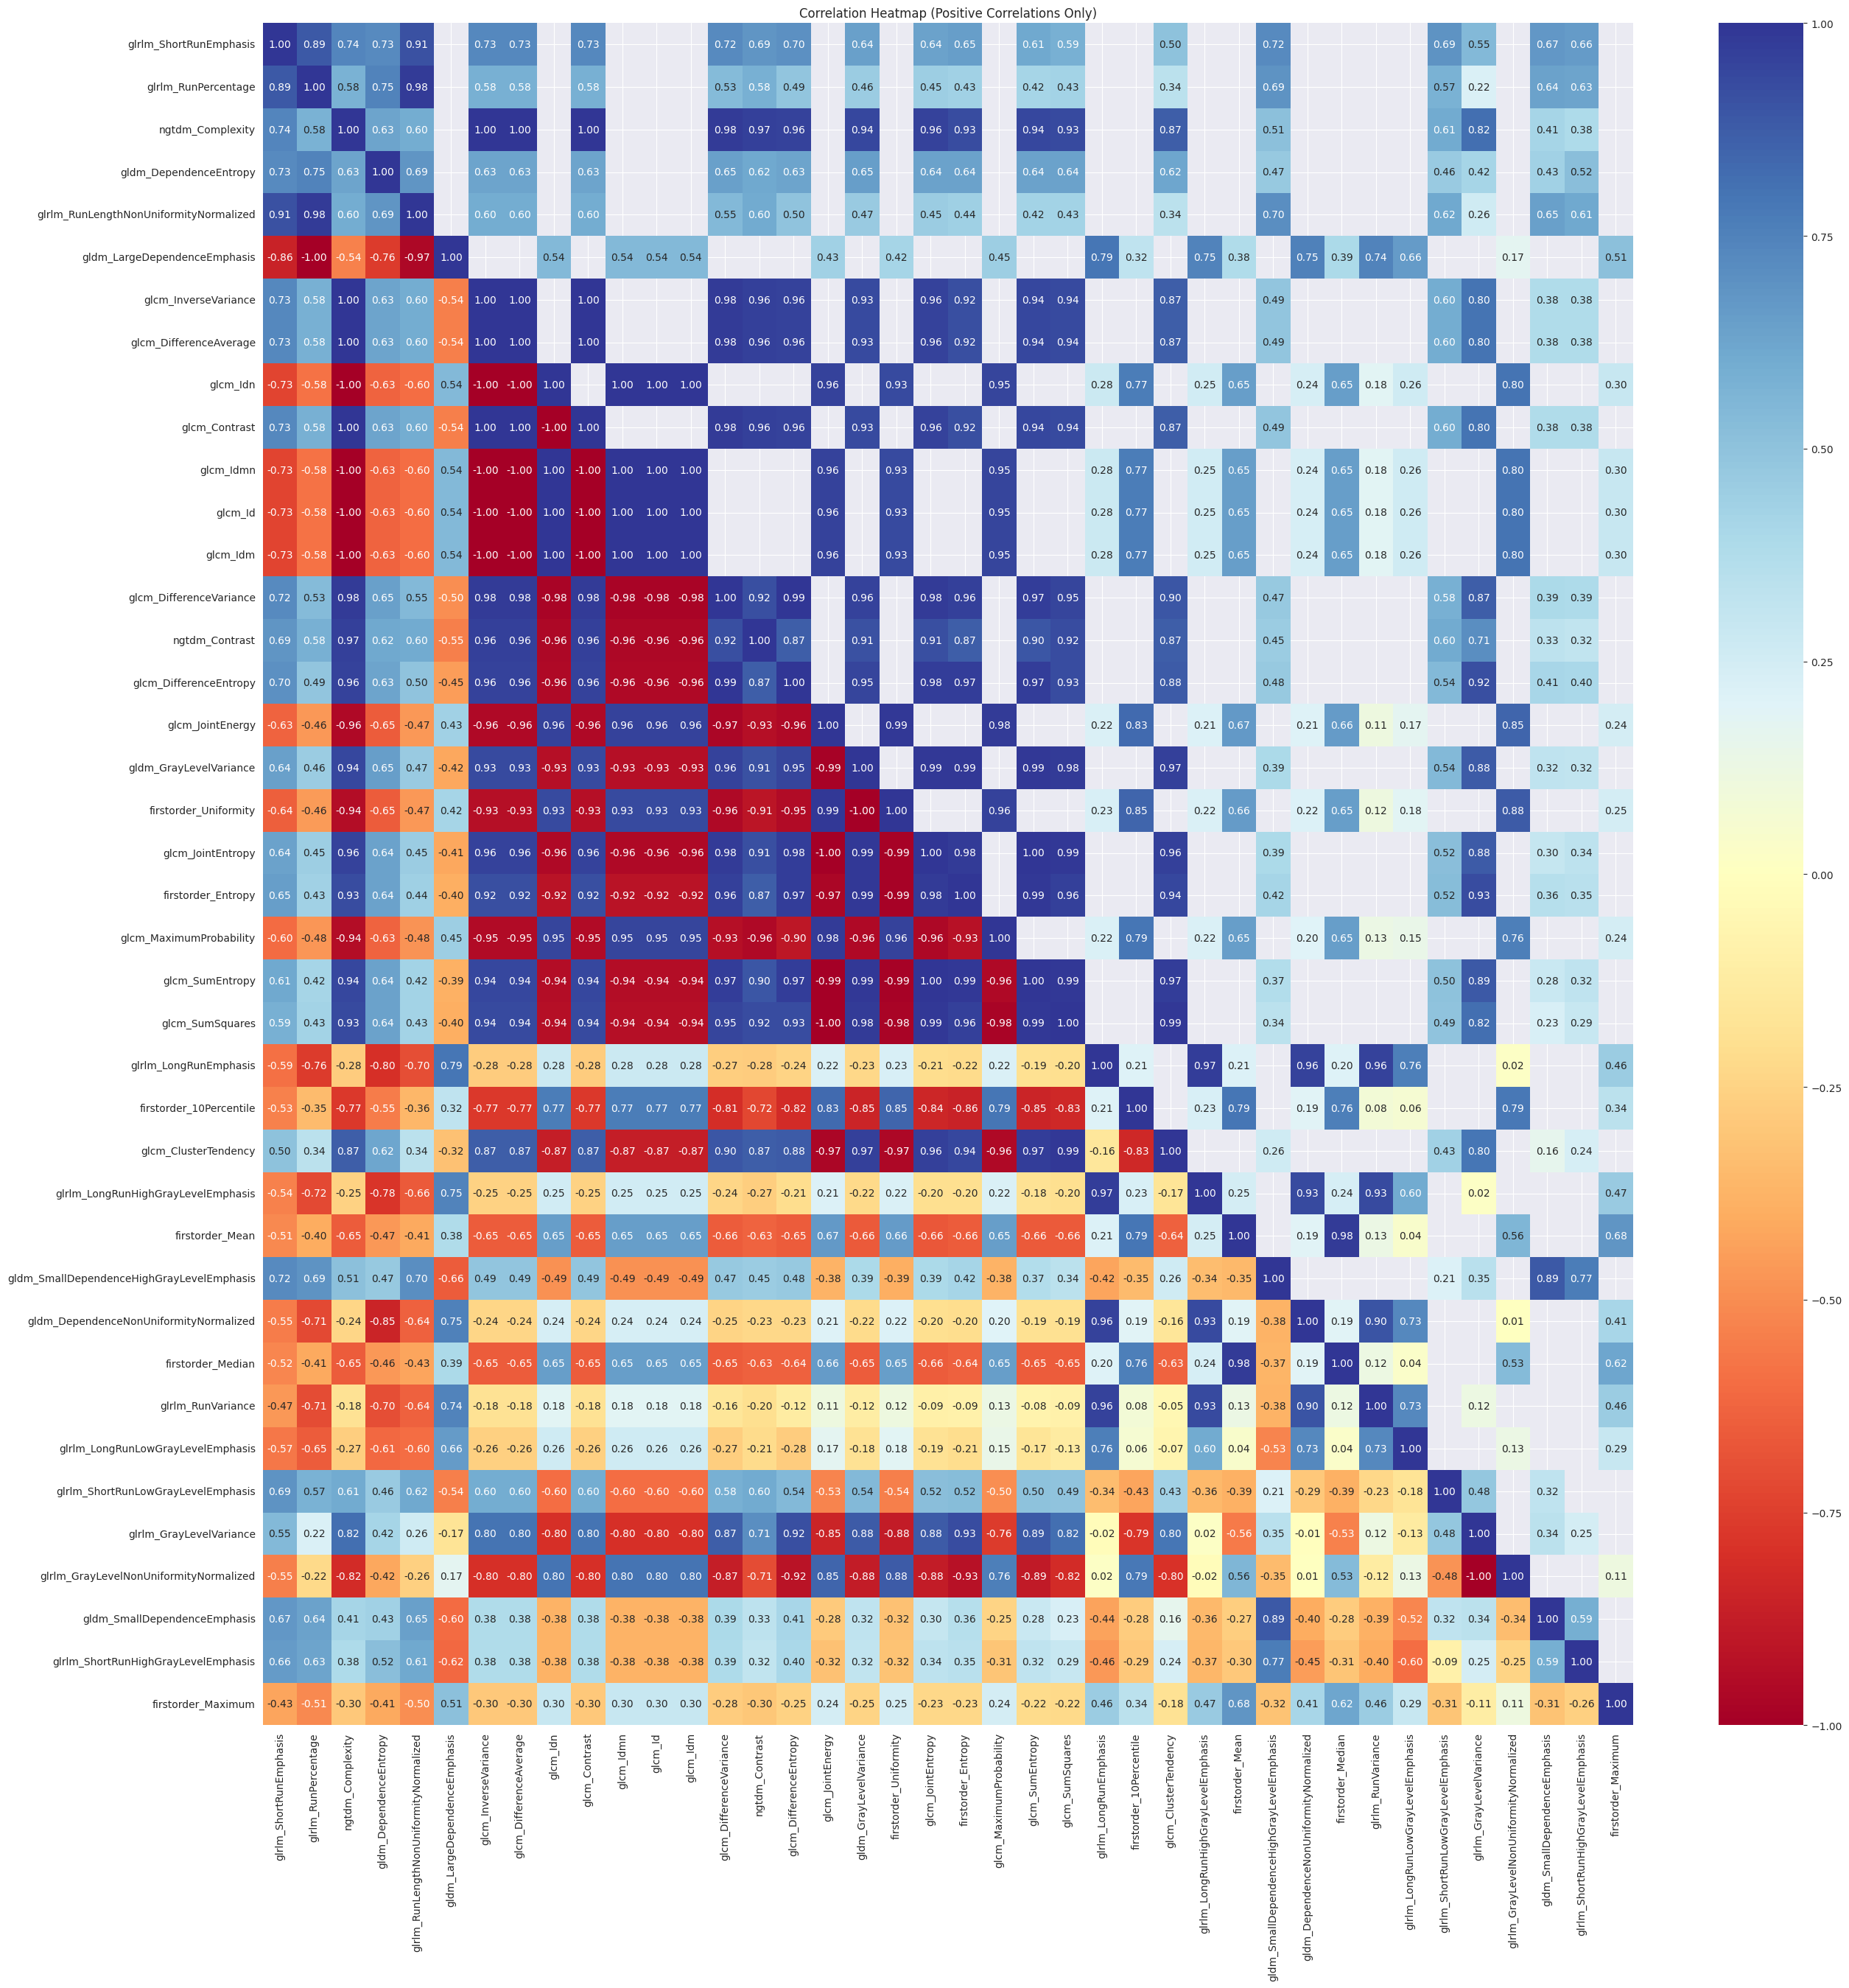

In [91]:
top_40 = data[top_40_features]

correlation_matrix = top_40.corr()

# Create a large heatmap
mask = np.triu(correlation_matrix <= 0)

# Create a large heatmap with positive correlations only
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu", mask=mask)

# Adjust the plot settings
plt.title("Correlation Heatmap (Positive Correlations Only)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()